In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])

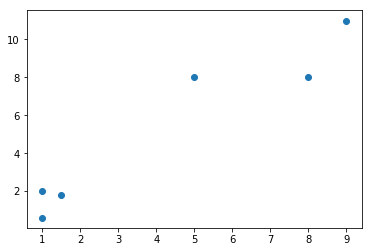

In [3]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [13]:
def fit (data, k = 2, max_iter = 100):
    means = []
    # randomly initialize the means
    for i in range(k):
        means.append(data[i])
    for i in range(max_iter):
        # assign the data points to the cluster that they belong to
        # create empty clusters       
        clusters = []
        for j in range(k):
            clusters.append([])
        for point in data:
            # find distance to all the mean values
            distances = [((point - m)**2).sum() for m in means]
            # find the min distance
            minDistance = min(distances)
            # find the mean for which we got the minimum distance --> l
            l = distances.index(minDistance)
            # add this point to cluster l
            clusters[l].append(point)

        # calculate the new mean values
        change = False
        for j in range(k):
            new_mean = np.average(clusters[j], axis=0)
            if not np.array_equal(means[j],new_mean):
                change = True
            means[j] = new_mean
        if not change:
            break
    return means

In [19]:
def predict(test_data,means):
    pred = []
    for point in test_data:
        # find distance to all the mean values
        distances = [((point - m)**2).sum() for m in means]
        # find the min distance
        minDistance = min(distances)
        # find the mean for which we got the minimum distance --> l
        l = distances.index(minDistance)
        # add this point to cluster l
        pred.append(l)
    return pred

In [17]:
means = fit(x)

In [22]:
pred = predict(x,means)
pred # It gives cluster corresponding to input

[0, 0, 1, 1, 0, 1]